A complex modern semi-conductor manufacturing process is normally under consistent surveillance via the monitoring of signals/variables collected from sensors and or process measurement points. However, not all of these signals are equally valuable in a specific monitoring system. The measured signals contain a combination of useful information, irrelevant information as well as noise. It is often the case that useful information is buried in the latter two. Engineers typically have a much larger number of signals than are actually required. If we consider each type of signal as a feature, then feature selection may be applied to identify the most relevant signals. The Process Engineers may then use these signals to determine key factors contributing to yield excursions downstream in the process. This will enable an increase in process throughput, decreased time to learning and reduce the per unit production costs.

[UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/179/secom)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("uci-secom.csv")
df.shape

(1567, 592)

In [3]:
df.head(1)

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.0,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.363,NaN,NaN,NaN,NaN,-1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [5]:
df.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [6]:
label_name = "Pass/Fail"

In [7]:
label_one_count = (df[label_name] == 1).sum()
label_one_count

104

In [8]:
df_label_not_one = df[df[label_name] == -1].sample(label_one_count)

In [9]:
df_under = pd.concat([df_label_not_one,  df[df[label_name] == 1]])
df_under.shape

(208, 592)

In [10]:
df_under[label_name].value_counts()

Pass/Fail
-1    104
 1    104
Name: count, dtype: int64

In [11]:
(df_under[label_name] == 1).astype(int)

950     0
86      0
1313    0
1162    0
1457    0
       ..
1365    1
1400    1
1438    1
1443    1
1519    1
Name: Pass/Fail, Length: 208, dtype: int64

In [12]:
X, y = df_under.drop(columns=[label_name, "Time"]), (df_under[label_name] == 1).astype(int)
X.shape, y.shape

((208, 590), (208,))

<Axes: >

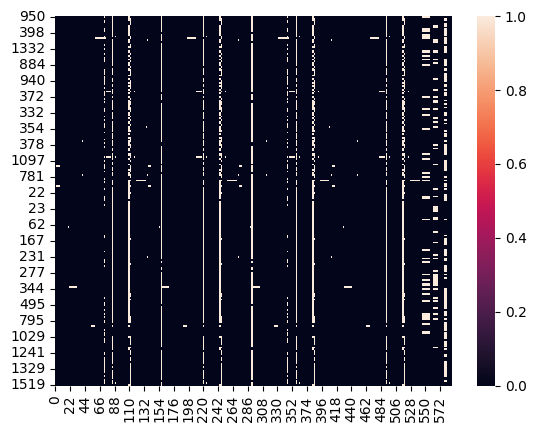

In [13]:
sns.heatmap(X.isnull())

## 결측치 채우기

In [14]:
X = X.fillna(0)
X.isnull().sum().sum()

0

## data split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.1, random_state=42)

X_train.shape

(187, 590)

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=128, input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(64, activation='selu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
class PrintDot(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

# val_loss 기준으로 값이 나아지지 않으면 멈추개 합니다.
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)

In [18]:
history = model.fit(X_train, y_train, validation_split=0.1, 
                    epochs=1000, verbose=0, callbacks=[early_stop, PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....

In [19]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,accuracy,val_loss,val_accuracy
299,0.330503,0.886905,12.292295,0.473684
300,0.304912,0.892857,12.210513,0.473684
301,0.309785,0.875000,12.133334,0.526316
302,0.296049,0.875000,12.545925,0.473684
303,0.318410,0.886905,12.598629,0.473684


<Axes: >

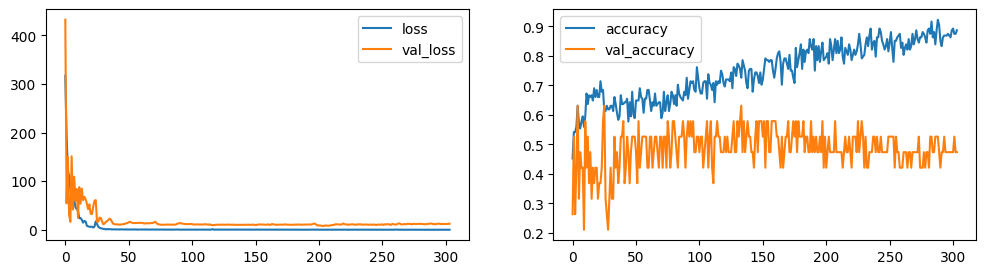

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12, 3))
df_hist[["loss", "val_loss"]].plot(ax=axes[0])
df_hist[["accuracy", "val_accuracy"]].plot(ax=axes[1])

In [22]:
y_pred = model.predict(X_test)
y_pred[:5]

1/1 [==============================] - 0s 60ms/step


array([[0.00931697],
       [0.8220449 ],
       [0.20475751],
       [0.8220449 ],
       [0.8220449 ]], dtype=float32)

In [24]:
y_predict = y_pred.flatten()
y_predict

array([9.3169743e-03, 8.2204491e-01, 2.0475751e-01, 8.2204491e-01,
       8.2204491e-01, 7.6637432e-02, 1.3638105e-03, 9.5516586e-01,
       3.9564850e-20, 4.8393589e-01, 8.2204491e-01, 7.1783102e-01,
       8.2204491e-01, 8.2204491e-01, 8.2204491e-01, 2.3893559e-25,
       8.2204491e-01, 3.7515317e-03, 5.8323503e-01, 8.0240893e-01,
       5.1677823e-03], dtype=float32)